In [1]:
import pandas as pd
import numpy as np
import re #Regular expressions are a powerful tool used for pattern matching within string
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# to show Matplotlib plots inline

In [2]:
data=pd.read_csv('mbti_1 - mbti_1.csv')

In [3]:
data.head(10)

,type,posts
0,INFJ,http://www.youtube.com/watch?v=qsXHcwe3krw|||h...
1,ENTP,I'm finding the lack of me in these posts very...
2,INTP,Good one _____ https://www.youtube.com/watc...
3,INTJ,"Dear INTP, I enjoyed our conversation the ot..."
4,ENTJ,You're fired.|||That's another silly misconcep...
5,INTJ,18/37 @.@|||Science is not perfect. No scient...
6,INFJ,"No, I can't draw on my own nails (haha). Those..."
7,INTJ,I tend to build up a collection of things on m...
8,INFJ,"I'm not sure, that's a good question. The dist..."
9,INTP,https://www.youtube.com/watch?v=w8-egj0y8Qs|||...


In [4]:
[p.split('|||')for p in data.head(2).posts.values]

[['http://www.youtube.com/watch?v=qsXHcwe3krw',
  'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg',
  'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks',
  'What has been the most life-changing experience in your life?',
  'http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.',
  'May the PerC Experience immerse you.',
  'The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206',
  "Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...",
  '84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/

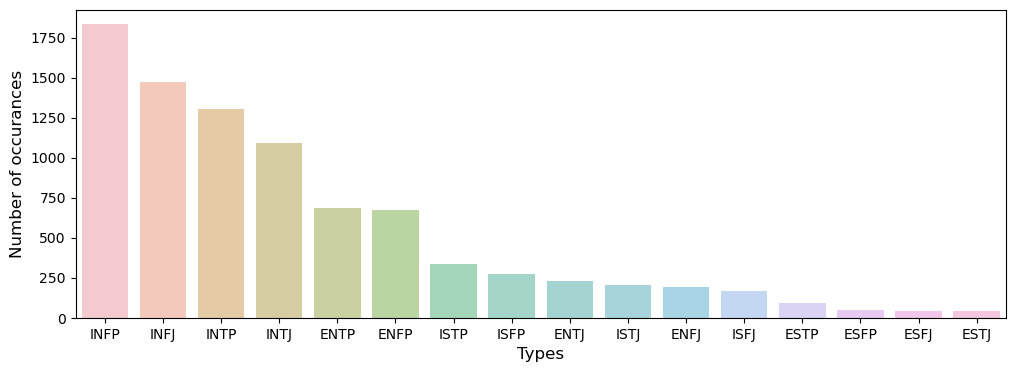

In [5]:
#distribution of the mbti personality types
cnt_types=data['type'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(x=cnt_types.index,y=cnt_types.values,alpha=0.5)
plt.ylabel('Number of occurances',fontsize=12)
plt.xlabel('Types',fontsize=12)
plt.show()

In [6]:
#add columns for the type indicator
def get_types(row):
    t=row['type']
    I=0;N=0
    T=0;J=0
    if t[0]=='I':I=1
    elif t[0]=='E':I=0
    else: print('I-E incorrect')
    if t[1]=='N':N=1
    elif t[1]=='S':N=0
    else: print('N-S incorrect')
    if t[2]=='T':T=1
    elif t[2]=='F':T=0
    else: print('T-F incorrect')
    if t[3]=='J':J=1
    elif t[3]=='P':J=0
    else: print('J-P incorrect')
    return pd.Series({'IE':I,'NS':N,'TF':T,'JP':J})
data=data.join(data.apply(lambda row:get_types (row),axis=1))
data.head(5)

,type,posts,IE,NS,TF,JP
0,INFJ,http://www.youtube.com/watch?v=qsXHcwe3krw|||h...,1,1,0,1
1,ENTP,I'm finding the lack of me in these posts very...,0,1,1,0
2,INTP,Good one _____ https://www.youtube.com/watc...,1,1,1,0
3,INTJ,"Dear INTP, I enjoyed our conversation the ot...",1,1,1,1
4,ENTJ,You're fired.|||That's another silly misconcep...,0,1,1,1


In [7]:
print("Introversion(I)/Extroversion(E):\t",data['IE'].value_counts()[0],"/",data['IE'].value_counts()[1])
print("Intuition(N)/Sensing(S):\t\t",data['NS'].value_counts()[0],"/",data['NS'].value_counts()[1])
print("Thinking(T)/Feeling(F):\t\t\t",data['TF'].value_counts()[0],"/",data['TF'].value_counts()[1])
print("Judging(J)/perceiving(P):\t\t",data['JP'].value_counts()[0],"/",data['JP'].value_counts()[1])

Introversion(I)/Extroversion(E):	 1999 / 6676
Intuition(N)/Sensing(S):		 1197 / 7478
Thinking(T)/Feeling(F):			 4694 / 3981
Judging(J)/perceiving(P):		 5241 / 3434


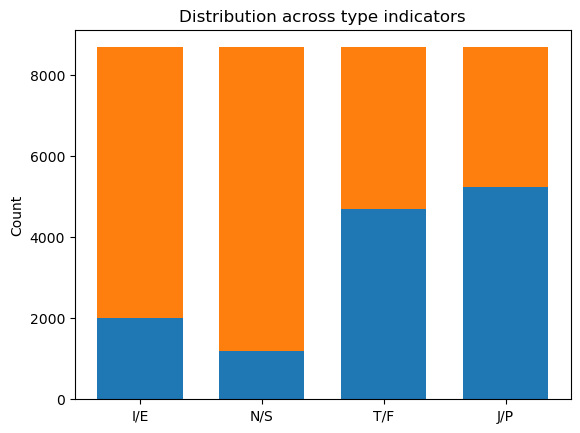

In [8]:
N=4
but=(data['IE'].value_counts()[0],data['NS'].value_counts()[0],data['TF'].value_counts()[0],data['JP'].value_counts()[0])
top=(data['IE'].value_counts()[1],data['NS'].value_counts()[1],data['TF'].value_counts()[1],data['JP'].value_counts()[1])
ind=np.arange(N)
width=0.7
p1=plt.bar(ind,but,width)
p2=plt.bar(ind,top,width,bottom=but)
plt.ylabel('Count')
plt.title('Distribution across type indicators')
plt.xticks(ind,('I/E','N/S','T/F','J/P'))
plt.show()

In [9]:
#pearson feature correlation
data[['IE','NS','TF','JP']].corr()

,IE,NS,TF,JP
IE,1.000000,-0.045899,-0.069573,0.161939
NS,-0.045899,1.000000,-0.080954,0.014922
TF,-0.069573,-0.080954,1.000000,-0.004673
JP,0.161939,0.014922,-0.004673,1.000000


<AxesSubplot:title={'center':'pearson features correlation'}>

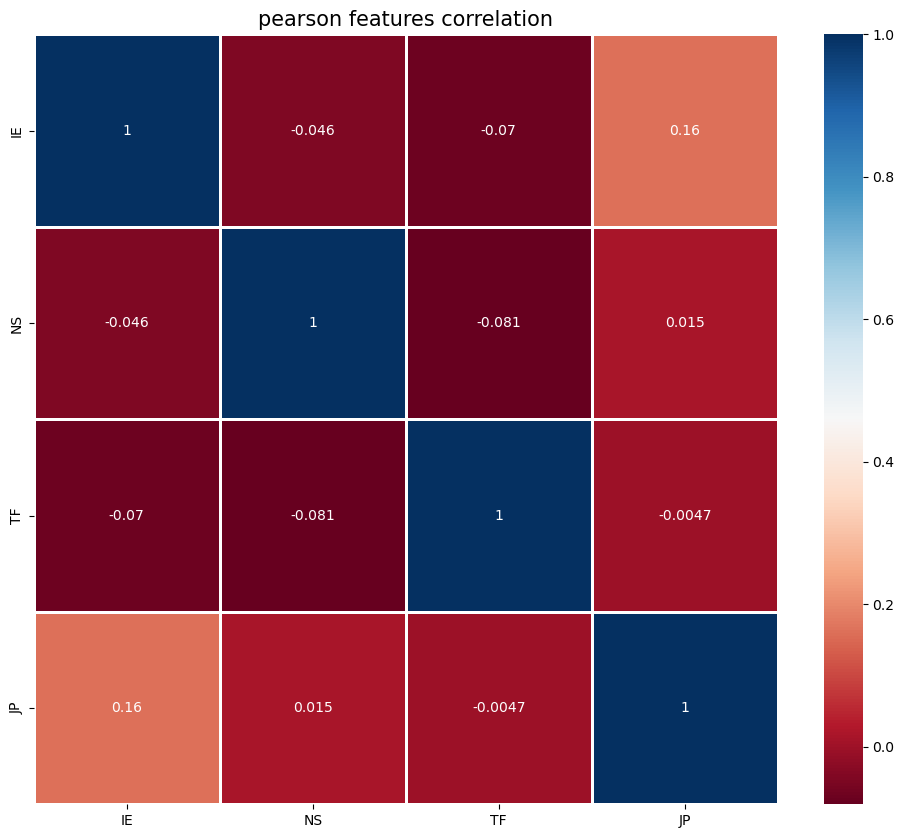

In [10]:
cmap=plt.cm.RdBu
corr=data[['IE','NS','TF','JP']].corr()
plt.figure(figsize=(12,10))
plt.title("pearson features correlation",size=15)
sns.heatmap(corr,cmap=cmap,annot=True,linewidths=1)

In [11]:
b_pers={'I':0,'E':1,'N':0,'S':1,'F':0,'T':1,'J':0,'P':1}
b_pers_list=[{0:'I',1:'E'},{0:'N',1:'S'},{0:'F',1:'T'},{0:'J',1:'P'}]
def translate_personality(personality):
    return [b_pers[l] for l in personality]
def translate_back(personality):
    s=""
    for i,l in enumerate(personality):
        s+=b_pers_list[i][l]
    return s
d=data.head(4)
list_personality_bin=np.array([translate_personality(p) for p in d.type])
print('Binarize MBTI list:\n%s' %list_personality_bin)

Binarize MBTI list:
[[0 0 0 0]
 [1 0 1 1]
 [0 0 1 1]
 [0 0 1 0]]


In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chall\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import word_tokenize
unique_type_list=['INF','ENTP','INTP','INTJ','ENTJ','ENFJ','INFP','ENFP','ISFP','ISTP','ISFJ','ISTJ','ESTP','ESFP','ESTJ','ESFJ']
unique_tyoe_list=[x.lower() for x in unique_type_list]
stemmer=PorterStemmer()
lemmatiser=WordNetLemmatizer()
cachedStopWords=stopwords.words("english")
def pre_process_data(data,remove_stop_words=True,remove_mbti_profiles=True):
    list_personality=[]
    list_posts=[]
    len_data=len(data)
    i=0
    for row in data.iterrows():
        i+=1
        if(i%500==0 or i==1 or i==len_data):
            print("%s of %s rows"%(i,len_data))
        posts=row[1].posts
        temp = re.sub(r'http\S+', ' ', posts)
        temp=re.sub("[^a-zA-Z]"," ",temp)
        temp=re.sub(" +",' ',temp).lower()
        if remove_stop_words:
            temp=" ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in cachedStopWords])
        else:
            temp=" ".join([lemmatiser.lemmatize(w) for w in temp.split(' ')])
        if remove_mbti_profiles:
            for t in unique_type_list:
                temp=temp.replace(t,"")
        type_labelized=translate_personality(row[1].type)
        list_personality.append(type_labelized)
        list_posts.append(temp)
    list_posts=np.array(list_posts)
    list_personality=np.array(list_personality)
    return list_posts,list_personality

In [14]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chall\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
list_posts,list_personality=pre_process_data(data,remove_stop_words=True)

1 of 8675 rows
500 of 8675 rows
1000 of 8675 rows
1500 of 8675 rows
2000 of 8675 rows
2500 of 8675 rows
3000 of 8675 rows
3500 of 8675 rows
4000 of 8675 rows
4500 of 8675 rows
5000 of 8675 rows
5500 of 8675 rows
6000 of 8675 rows
6500 of 8675 rows
7000 of 8675 rows
7500 of 8675 rows
8000 of 8675 rows
8500 of 8675 rows
8675 of 8675 rows


In [26]:
print("Num posts and personalities: ",list_posts.shape,list_personality.shape)


Num posts and personalities:  (8675,) (8675, 4)


In [27]:
list_posts[0]

' intj moment sportscenter top ten play prank life changing experience life repeat today may perc experience immerse last thing infj friend posted facebook committing suicide next day rest peace enfj sorry hear distress natural relationship perfection time every moment existence try figure hard time time growth welcome stuff game set match prozac wellbrutin least thirty minute moving leg mean moving sitting desk chair weed moderation maybe try edible healthier alternative basically come three item determined type whichever type want would likely use given type cognitive function whatnot left thing moderation sims indeed video game good one note good one somewhat subjective completely promoting death given sim dear enfp favorite video game growing current favorite video game cool appears late sad someone everyone wait thought confidence good thing cherish time solitude b c revel within inner world whereas time workin enjoy time worry people always around yo entp lady complimentary perso

In [28]:
list_personality[0]

array([0, 0, 0, 0])

In [29]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

In [30]:
cntizer=CountVectorizer(analyzer="word",
                       max_features=1500,
                       tokenizer=None,
                       preprocessor=None,
                       stop_words=None,
                       max_df=0.7,
                       min_df=0.1)
print('CountVectorizer...')
x_cnt=cntizer.fit_transform(list_posts)
tfizer=TfidfTransformer()
print("Tf-idf...")
x_tfidf=tfizer.fit_transform(x_cnt).toarray()

CountVectorizer...
Tf-idf...


In [31]:
feature_names=list(enumerate(cntizer.get_feature_names_out()))
feature_names

[(0, 'ability'),
 (1, 'able'),
 (2, 'absolutely'),
 (3, 'accept'),
 (4, 'accurate'),
 (5, 'across'),
 (6, 'act'),
 (7, 'action'),
 (8, 'actual'),
 (9, 'actually'),
 (10, 'add'),
 (11, 'admit'),
 (12, 'advice'),
 (13, 'afraid'),
 (14, 'age'),
 (15, 'ago'),
 (16, 'agree'),
 (17, 'ah'),
 (18, 'almost'),
 (19, 'alone'),
 (20, 'along'),
 (21, 'already'),
 (22, 'although'),
 (23, 'amazing'),
 (24, 'amount'),
 (25, 'angry'),
 (26, 'animal'),
 (27, 'annoying'),
 (28, 'another'),
 (29, 'answer'),
 (30, 'anxiety'),
 (31, 'anymore'),
 (32, 'anyone'),
 (33, 'anything'),
 (34, 'anyway'),
 (35, 'apparently'),
 (36, 'appreciate'),
 (37, 'approach'),
 (38, 'area'),
 (39, 'argument'),
 (40, 'around'),
 (41, 'art'),
 (42, 'ask'),
 (43, 'asked'),
 (44, 'asking'),
 (45, 'aspect'),
 (46, 'assume'),
 (47, 'attention'),
 (48, 'attracted'),
 (49, 'avatar'),
 (50, 'avoid'),
 (51, 'aware'),
 (52, 'away'),
 (53, 'awesome'),
 (54, 'awkward'),
 (55, 'baby'),
 (56, 'back'),
 (57, 'bad'),
 (58, 'based'),
 (59, 'basi

In [32]:
x_tfidf.shape

(8675, 813)

In [33]:
print("X: Posts in tf-idf represntation \n* 1st row:\n%s" % x_tfidf[0])

X: Posts in tf-idf represntation 
* 1st row:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.07926003 0.06726238 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.10174255 0.         0.04897692 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.10821121 0.         0.         0.         0.08516529
 0.         0.         0.1032927  0.         0.         0.
 0.         0.         0.05109893 0.06721919 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.

In [34]:
type_indicators=['IE:Introversion(I)/Extroversion(E)','NS: Intuition(N)-Sensing(S)','FT:Feeling(F)-Thinking(T)','JP:Judging(J)-perceiving(P)' ]

In [35]:
for l in range(len(type_indicators)):
    print(type_indicators[l])

IE:Introversion(I)/Extroversion(E)
NS: Intuition(N)-Sensing(S)
FT:Feeling(F)-Thinking(T)
JP:Judging(J)-perceiving(P)


In [36]:
print("MBTI 1st row %s" % translate_back(list_personality[0,:]))
print("Y:Binarized MBTI 1st row %s" % list_personality[0,:])

MBTI 1st row INFJ
Y:Binarized MBTI 1st row [0 0 0 0]


In [37]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [38]:
x=x_tfidf
for l in range(len(type_indicators)):
    print("%s..."% (type_indicators[l]))
    y=list_personality[:,l]
    seed=7
    test_size=0.33
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=test_size,random_state=seed)
    model=XGBClassifier()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    predictions=[round(value) for value in y_pred]
    accuracy=accuracy_score(y_test,predictions)
    print("* %s Accuracy: %.2f%%" %(type_indicators[l],accuracy*100.0))

IE:Introversion(I)/Extroversion(E)...
* IE:Introversion(I)/Extroversion(E) Accuracy: 86.52%
NS: Intuition(N)-Sensing(S)...
* NS: Intuition(N)-Sensing(S) Accuracy: 89.70%
FT:Feeling(F)-Thinking(T)...
* FT:Feeling(F)-Thinking(T) Accuracy: 84.28%
JP:Judging(J)-perceiving(P)...
* JP:Judging(J)-perceiving(P) Accuracy: 80.16%


In [43]:
# Let's train type indicator individually
for l in range(len(type_indicators)):
    print("%s..." % (type_indicators[l]))
    y = list_personality[:,l]
# split data into train and test sets
    seed = 7
    test_size = 0.33
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
# fit model on training data
    model = XGBClassifier()
    eval_set = [(x_test, y_test)] 
    model.fit(x_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)
# make predictions for test data
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
# evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("* %s Accuracy: %.2f%%" % (type_indicators[1], accuracy * 100.0))

IE:Introversion(I)/Extroversion(E)...


C:\Users\chall\anaconda3\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\chall\anaconda3\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.46330
[1]	validation_0-logloss:0.42534
[2]	validation_0-logloss:0.40133
[3]	validation_0-logloss:0.38454
[4]	validation_0-logloss:0.37485
[5]	validation_0-logloss:0.36763
[6]	validation_0-logloss:0.36100
[7]	validation_0-logloss:0.35548
[8]	validation_0-logloss:0.35215
[9]	validation_0-logloss:0.34972
[10]	validation_0-logloss:0.34431
[11]	validation_0-logloss:0.34159
[12]	validation_0-logloss:0.33809
[13]	validation_0-logloss:0.33517
[14]	validation_0-logloss:0.33344
[15]	validation_0-logloss:0.33440
[16]	validation_0-logloss:0.33652
[17]	validation_0-logloss:0.33478
[18]	validation_0-logloss:0.33371
[19]	validation_0-logloss:0.33234
[20]	validation_0-logloss:0.33137
[21]	validation_0-logloss:0.33015
[22]	validation_0-logloss:0.33017
[23]	validation_0-logloss:0.32819
[24]	validation_0-logloss:0.32831
[25]	validation_0-logloss:0.32862
[26]	validation_0-logloss:0.32828
[27]	validation_0-logloss:0.32921
[28]	validation_0-logloss:0.33116
[29]	validation_0-loglos

C:\Users\chall\anaconda3\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\chall\anaconda3\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.36449
[1]	validation_0-logloss:0.33834
[2]	validation_0-logloss:0.32024
[3]	validation_0-logloss:0.30601
[4]	validation_0-logloss:0.29668
[5]	validation_0-logloss:0.28994
[6]	validation_0-logloss:0.28472
[7]	validation_0-logloss:0.28167
[8]	validation_0-logloss:0.28013
[9]	validation_0-logloss:0.27825
[10]	validation_0-logloss:0.27651
[11]	validation_0-logloss:0.27544
[12]	validation_0-logloss:0.27506
[13]	validation_0-logloss:0.27605
[14]	validation_0-logloss:0.27556
[15]	validation_0-logloss:0.27678
[16]	validation_0-logloss:0.27691
[17]	validation_0-logloss:0.27613
[18]	validation_0-logloss:0.27518
[19]	validation_0-logloss:0.27550
[20]	validation_0-logloss:0.27450
[21]	validation_0-logloss:0.27383
[22]	validation_0-logloss:0.27299
[23]	validation_0-logloss:0.27364
[24]	validation_0-logloss:0.27255
[25]	validation_0-logloss:0.27210
[26]	validation_0-logloss:0.27128
[27]	validation_0-logloss:0.27314
[28]	validation_0-logloss:0.27339
[29]	validation_0-loglos

C:\Users\chall\anaconda3\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\chall\anaconda3\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.60000
[1]	validation_0-logloss:0.54902
[2]	validation_0-logloss:0.52285
[3]	validation_0-logloss:0.50083
[4]	validation_0-logloss:0.48759
[5]	validation_0-logloss:0.47431
[6]	validation_0-logloss:0.46433
[7]	validation_0-logloss:0.45944
[8]	validation_0-logloss:0.44958
[9]	validation_0-logloss:0.44586
[10]	validation_0-logloss:0.44036
[11]	validation_0-logloss:0.43346
[12]	validation_0-logloss:0.42977
[13]	validation_0-logloss:0.42667
[14]	validation_0-logloss:0.42349
[15]	validation_0-logloss:0.42084
[16]	validation_0-logloss:0.41859
[17]	validation_0-logloss:0.41739
[18]	validation_0-logloss:0.41353
[19]	validation_0-logloss:0.41184
[20]	validation_0-logloss:0.41101
[21]	validation_0-logloss:0.40931
[22]	validation_0-logloss:0.40811
[23]	validation_0-logloss:0.40626
[24]	validation_0-logloss:0.40615
[25]	validation_0-logloss:0.40554
[26]	validation_0-logloss:0.40587
[27]	validation_0-logloss:0.40496
[28]	validation_0-logloss:0.40348
[29]	validation_0-loglos

C:\Users\chall\anaconda3\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\chall\anaconda3\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.59808
[1]	validation_0-logloss:0.55859
[2]	validation_0-logloss:0.53177
[3]	validation_0-logloss:0.51515
[4]	validation_0-logloss:0.49899
[5]	validation_0-logloss:0.48682
[6]	validation_0-logloss:0.47597
[7]	validation_0-logloss:0.46864
[8]	validation_0-logloss:0.46431
[9]	validation_0-logloss:0.46128
[10]	validation_0-logloss:0.45585
[11]	validation_0-logloss:0.45209
[12]	validation_0-logloss:0.45162
[13]	validation_0-logloss:0.44867
[14]	validation_0-logloss:0.44446
[15]	validation_0-logloss:0.44434
[16]	validation_0-logloss:0.44375
[17]	validation_0-logloss:0.44229
[18]	validation_0-logloss:0.44052
[19]	validation_0-logloss:0.44108
[20]	validation_0-logloss:0.44029
[21]	validation_0-logloss:0.43959
[22]	validation_0-logloss:0.44009
[23]	validation_0-logloss:0.44097
[24]	validation_0-logloss:0.44090
[25]	validation_0-logloss:0.44262
[26]	validation_0-logloss:0.44225
[27]	validation_0-logloss:0.44139
[28]	validation_0-logloss:0.44090
[29]	validation_0-loglos

In [52]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x = x_tfidf
for l in range(len(type_indicators)):
    print('%s...'% (type_indicators[l]))
    y=list_personality[:,1]
    seed=7
    test_size=0.33
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=test_size,random_state=seed)
    model=XGBClassifier()
    eval_set=[(x_train,y_train)]
    model.fit(x_train,y_train,early_stopping_rounds=10,eval_metric="logloss",eval_set=eval_set,verbose=True)
    y_pred=model.predict(x_test)
    predictions=[round(value) for value in y_pred]
    accuracy=accuracy_score(y_test,predictions)
    print("* %s Accuracy:%.2f%%" % (type_indicators[l],accuracy*100.0))

IE:Introversion(I)/Extroversion(E)...
[0]	validation_0-logloss:0.33737
[1]	validation_0-logloss:0.29208
[2]	validation_0-logloss:0.26133
[3]	validation_0-logloss:0.23821
[4]	validation_0-logloss:0.21848
[5]	validation_0-logloss:0.20653
[6]	validation_0-logloss:0.19498
[7]	validation_0-logloss:0.18363
[8]	validation_0-logloss:0.17287
[9]	validation_0-logloss:0.16459
[10]	validation_0-logloss:0.15500
[11]	validation_0-logloss:0.14690
[12]	validation_0-logloss:0.14141
[13]	validation_0-logloss:0.13238
[14]	validation_0-logloss:0.12568
[15]	validation_0-logloss:0.11825
[16]	validation_0-logloss:0.11383
[17]	validation_0-logloss:0.10968
[18]	validation_0-logloss:0.10702
[19]	validation_0-logloss:0.10294
[20]	validation_0-logloss:0.10027
[21]	validation_0-logloss:0.09631
[22]	validation_0-logloss:0.09255
[23]	validation_0-logloss:0.08765
[24]	validation_0-logloss:0.08484
[25]	validation_0-logloss:0.08234
[26]	validation_0-logloss:0.07967
[27]	validation_0-logloss:0.07642
[28]	validation_0-lo

C:\Users\chall\anaconda3\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\chall\anaconda3\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.33737
[1]	validation_0-logloss:0.29208
[2]	validation_0-logloss:0.26133
[3]	validation_0-logloss:0.23821
[4]	validation_0-logloss:0.21848
[5]	validation_0-logloss:0.20653
[6]	validation_0-logloss:0.19498
[7]	validation_0-logloss:0.18363
[8]	validation_0-logloss:0.17287
[9]	validation_0-logloss:0.16459
[10]	validation_0-logloss:0.15500
[11]	validation_0-logloss:0.14690
[12]	validation_0-logloss:0.14141
[13]	validation_0-logloss:0.13238
[14]	validation_0-logloss:0.12568
[15]	validation_0-logloss:0.11825
[16]	validation_0-logloss:0.11383
[17]	validation_0-logloss:0.10968
[18]	validation_0-logloss:0.10702
[19]	validation_0-logloss:0.10294
[20]	validation_0-logloss:0.10027
[21]	validation_0-logloss:0.09631
[22]	validation_0-logloss:0.09255
[23]	validation_0-logloss:0.08765
[24]	validation_0-logloss:0.08484
[25]	validation_0-logloss:0.08234
[26]	validation_0-logloss:0.07967
[27]	validation_0-logloss:0.07642
[28]	validation_0-logloss:0.07258
[29]	validation_0-loglos

C:\Users\chall\anaconda3\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\chall\anaconda3\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.33737
[1]	validation_0-logloss:0.29208
[2]	validation_0-logloss:0.26133
[3]	validation_0-logloss:0.23821
[4]	validation_0-logloss:0.21848
[5]	validation_0-logloss:0.20653
[6]	validation_0-logloss:0.19498
[7]	validation_0-logloss:0.18363
[8]	validation_0-logloss:0.17287
[9]	validation_0-logloss:0.16459
[10]	validation_0-logloss:0.15500
[11]	validation_0-logloss:0.14690
[12]	validation_0-logloss:0.14141
[13]	validation_0-logloss:0.13238
[14]	validation_0-logloss:0.12568
[15]	validation_0-logloss:0.11825
[16]	validation_0-logloss:0.11383
[17]	validation_0-logloss:0.10968
[18]	validation_0-logloss:0.10702
[19]	validation_0-logloss:0.10294
[20]	validation_0-logloss:0.10027
[21]	validation_0-logloss:0.09631
[22]	validation_0-logloss:0.09255
[23]	validation_0-logloss:0.08765
[24]	validation_0-logloss:0.08484
[25]	validation_0-logloss:0.08234
[26]	validation_0-logloss:0.07967
[27]	validation_0-logloss:0.07642
[28]	validation_0-logloss:0.07258
[29]	validation_0-loglos

C:\Users\chall\anaconda3\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\chall\anaconda3\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.33737
[1]	validation_0-logloss:0.29208
[2]	validation_0-logloss:0.26133
[3]	validation_0-logloss:0.23821
[4]	validation_0-logloss:0.21848
[5]	validation_0-logloss:0.20653
[6]	validation_0-logloss:0.19498
[7]	validation_0-logloss:0.18363
[8]	validation_0-logloss:0.17287
[9]	validation_0-logloss:0.16459
[10]	validation_0-logloss:0.15500
[11]	validation_0-logloss:0.14690
[12]	validation_0-logloss:0.14141
[13]	validation_0-logloss:0.13238
[14]	validation_0-logloss:0.12568
[15]	validation_0-logloss:0.11825
[16]	validation_0-logloss:0.11383
[17]	validation_0-logloss:0.10968
[18]	validation_0-logloss:0.10702
[19]	validation_0-logloss:0.10294
[20]	validation_0-logloss:0.10027
[21]	validation_0-logloss:0.09631
[22]	validation_0-logloss:0.09255
[23]	validation_0-logloss:0.08765
[24]	validation_0-logloss:0.08484
[25]	validation_0-logloss:0.08234
[26]	validation_0-logloss:0.07967
[27]	validation_0-logloss:0.07642
[28]	validation_0-logloss:0.07258
[29]	validation_0-loglos

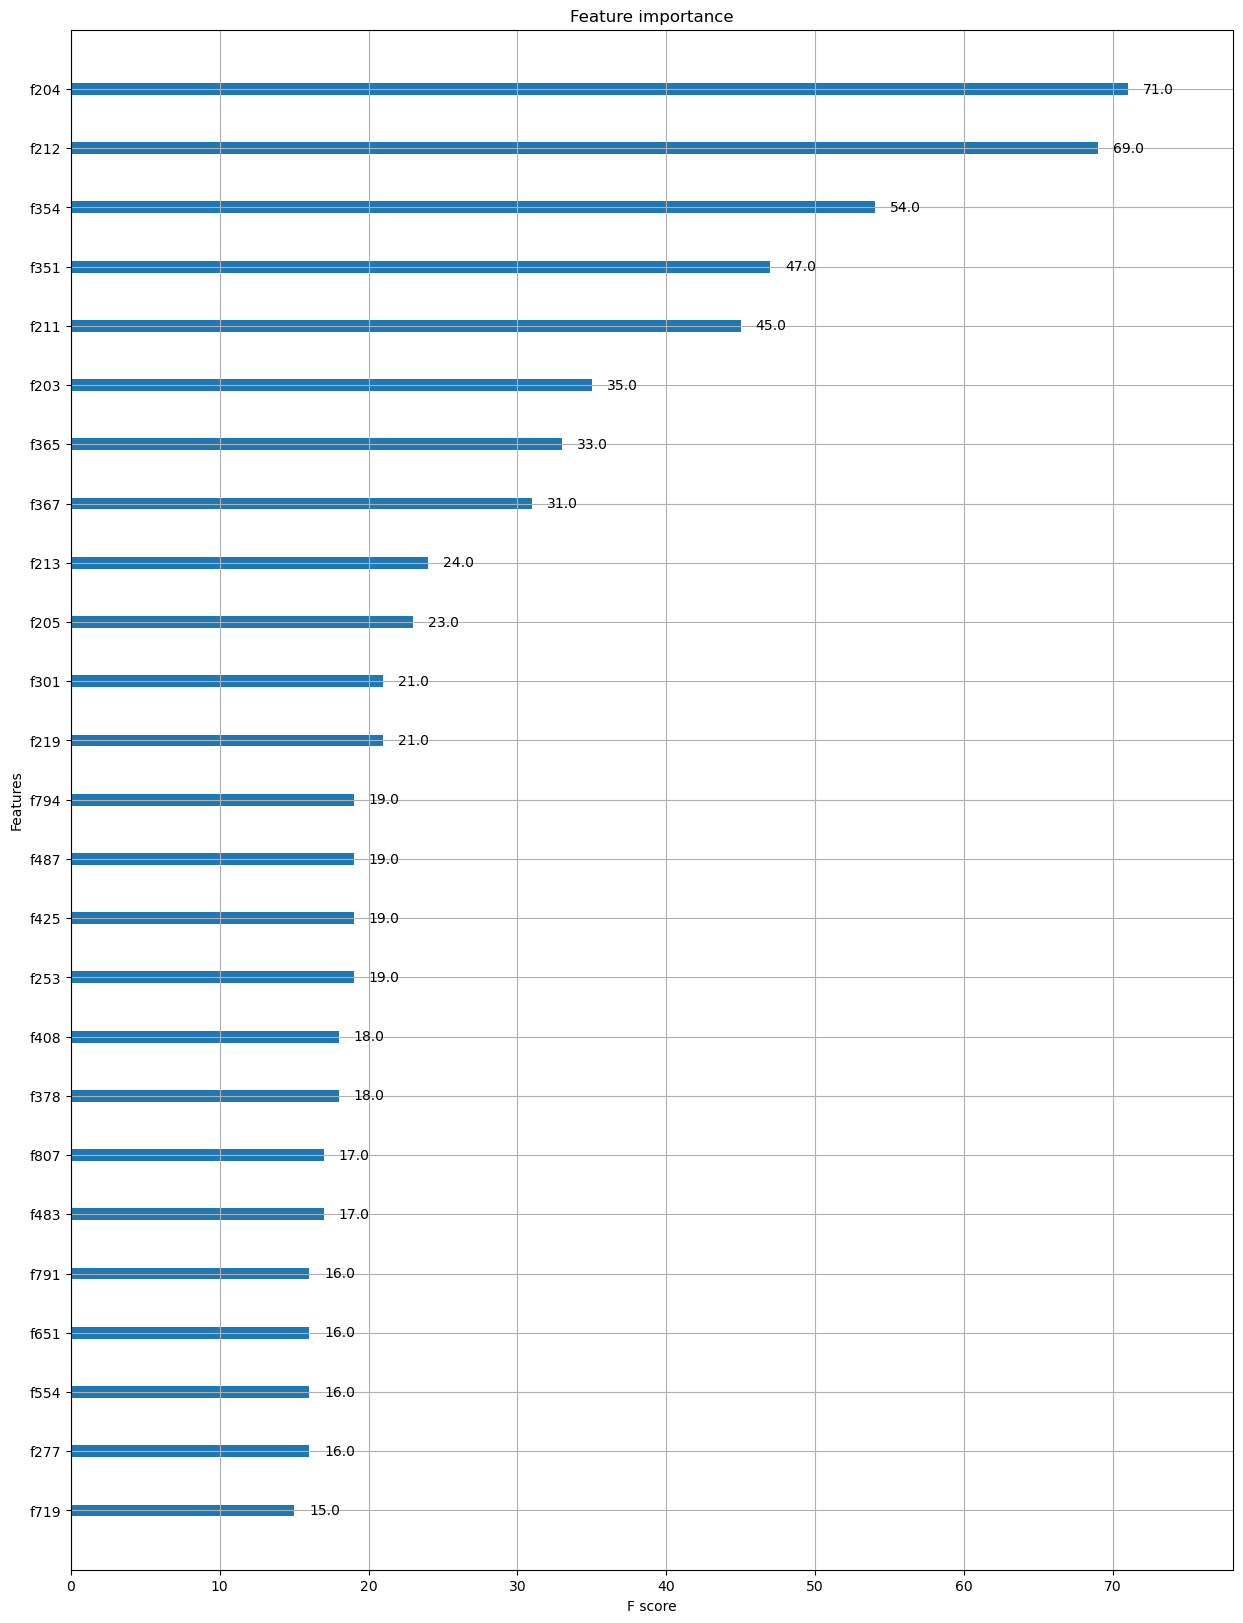

In [48]:
from xgboost import plot_importance
#Only the 1st indicator
y = list_personality[:,0]
#fit model on training data
model = XGBClassifier()
model.fit(x, y)
ax = plot_importance(model, max_num_features=25)
fig = ax.figure
fig.set_size_inches (15, 20)
plt.show()

In [53]:
features = sorted(list(enumerate(model.feature_importances_)), key=lambda x: x[1], reverse=True) 
for f in features[0:125]:
    print("%d\t%f\t%s" % (f[0],f[1],cntizer.get_feature_names_out() [f[0]]))

505	0.014024	ok
378	0.009661	istp
758	0.008372	user
529	0.008254	pay
680	0.007826	straight
796	0.007748	worse
389	0.007240	known
377	0.007094	istj
365	0.007060	intj
156	0.006910	dear
351	0.006895	infj
219	0.006825	estp
355	0.006687	infps
375	0.006639	isfp
374	0.006487	isfj
27	0.006203	annoying
19	0.006110	alone
745	0.006025	tv
318	0.005919	hell
484	0.005796	necessarily
87	0.005483	called
419	0.005414	literally
354	0.005406	infp
401	0.005250	lead
799	0.005159	wow
352	0.005016	infjs
693	0.004950	support
367	0.004933	intp
80	0.004910	boyfriend
532	0.004777	perhaps
736	0.004716	tried
597	0.004655	response
394	0.004602	late
639	0.004545	sister
155	0.004503	deal
197	0.004454	emotion
204	0.004250	enfp
304	0.004097	half
212	0.004080	entp
218	0.004053	estj
544	0.004031	plan
371	0.004020	intuition
260	0.004006	finally
106	0.004005	class
362	0.004001	interested
563	0.003951	process
559	0.003935	present
117	0.003930	comment
215	0.003891	esfj
596	0.003797	respect
811	0.003732	young
211	0.003725	ent

In [54]:
default_get_xgb_params = model.get_xgb_params() 
print (default_get_xgb_params)

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'eval_metric': None, 'gamma': None, 'grow_policy': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [55]:
def plot_confusion_matrix(
    cm,
    classes,
    normalize=False,
    title="Confusion Matrix",
    cmap=plt.cm.Blues):
 plt.imshow(cm, interpolation='nearest', cman=cmap)
 plt.title(title)
 plt.colorbar()
 tick_marks = np.arange(len(classes))
 plt.xticks(tick_marks, classes, rotation=45)
 plt.yticks(tick_marks, classes)

 if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
 else:
    print('Confusion matrix, without normalization')
 print(cm)
 thresh = cm.max() / 2
 for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment='center',
             color='white' if cm[i,j] > thresh else 'black')

 plt.tight_layout()
 plt.ylabel('True label')
 plt.xlabel('Predicted label')
 plt.show()

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
x = x_tfidf
param = {}
param['n_estimators'] = 200
param['max_depth'] = 2
param['nthread'] = 8
param['learning_rate'] = 0.2
for l in range(len(type_indicators)): 
    print("%s..." % (type_indicators[l]))
    y = list_personality[:,l]
    model = XGBClassifier(**param)
    print("hello")
    param_grid = {'n_estimators': [ 200, 300],'learning_rate': [ 0.2, 0.3]}
    kfold=StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
    grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
    grid_result = grid_search.fit(x, y)
    print(" Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) 
    means=grid_result.cv_results_['mean_test_score']
    stds=grid_result.cv_results_['std_test_score']
    params=grid_result.cv_results_['params']
    for mean,stdev,param in zip(means,stds,params):
        print("* %f (%f) with: %r"%(mean,stdev,param))

In [ ]:
my_posts="Pained by the demise of Ustad Rashid Khan Ji, a legendary figure in the world of Indian classical music. 
His unparalleled talent and dedication to music enriched our cultural world and inspired generations. 
His passing leaves a void that will be hard to fill. 
My heartfelt condolences to his family, disciples and countless admirers.
The people of Ahmedabad gave a warm welcome to HH @MohamedBinZayed.
Heartiest congratulations to my friend @tsheringtobgayand the People’s Democratic Party for winning the parliamentary elections in Bhutan. Look forward to working together again to further strengthen our unique ties of friendship and cooperation.
Congratulations to the illustrious winners of the National Sports and Adventure Awards 2023. Their remarkable achievements and unwavering dedication are an inspiration to our nation. "
mydata=pd.DataFrame(data={type:['INF'],'posts':[my_posts]})
my_posts,dummy=pr_process_data(mydata,remove_stop_words=True)
my_x_cnt=cntizer.transform(my_posts)
my_x_tfidf=tfizer.tranform(my_x_cnt).toarray()

In [ ]:
param = {}
param['n_estimators'] = 200
param['max_depth'] = 2
param['nthread'] = 8
param['learning_rate'] = 0.2
result=[]
for l in range(len(type_indicators)): 
    print("%s..." % (type_indicators[l]))
    y = list_personality[:,l]
    seed=7
    test_size=0.33
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
    model = XGBClassifier()
    model.fit(x_train, y_train)
    y_pred = model.predict(my_x_tfidf)
    result.append(y_pred[0])
print("The result is:",translate_back(result))